In [1]:
import numpy as np

import pandas as pd

import pandas_datareader.data as pdr

import matplotlib.pyplot as plt

import datetime

import torch

import torch.nn as nn

from torch.autograd import Variable

import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# GPU setting

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(torch.cuda.get_device_name(0)) #Google colab = TESLA T4

Tesla T4


In [3]:
 
# Training/Test ratio = 7:3

Train_ratio = 0.7

Test_ratio = 0.3

In [52]:
 

# Data load

dataset = pd.read_csv('경기도전체.csv')

df = dataset
df

,경기도 가평군 가평읍 달전리 281,경기도 가평군 가평읍 대곡리 360,경기도 가평군 가평읍 대곡리 366-8,경기도 가평군 가평읍 대곡리 402-1,경기도 가평군 가평읍 읍내리 260,경기도 가평군 가평읍 읍내리 681-3,경기도 가평군 가평읍 읍내리 771-1,경기도 가평군 설악면 선촌리 663,경기도 가평군 청평면 청평리 306,경기도 가평군 청평면 청평리 470-37,...,경기도 화성시 향남읍 행정리 443,경기도 화성시 향남읍 행정리 475,경기도 화성시 향남읍 행정리 479,경기도 화성시 향남읍 행정리 480,경기도 화성시 향남읍 행정리 482,경기도 화성시 향남읍 행정리 485,경기도 화성시 향남읍 행정리 491,경기도 화성시 향남읍 행정리 492,경기도 화성시 향남읍 행정리 494,경기도 화성시 청계동 513
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,115.555556,98.710866,NaN,NaN,148.571429,98.245614,130.731707,98.769899,102.631579,99.932203,...,NaN,96.156352,92.592593,96.820513,104.090177,98.930983,111.236377,98.652291,94.780220,104.732124
2,99.047619,79.926335,NaN,NaN,NaN,65.964912,131.707317,102.785818,NaN,94.237288,...,104.758200,101.042345,90.193821,99.733333,96.850242,105.213803,102.668170,98.831986,96.611722,115.511118
3,NaN,106.813996,NaN,104.155125,NaN,52.631579,NaN,92.619392,103.684210,90.169492,...,100.350058,99.127036,91.882556,104.820513,101.771337,108.589647,94.601027,100.909704,106.684982,112.171556
4,NaN,95.764273,NaN,NaN,NaN,NaN,106.829268,106.367583,107.894737,95.386441,...,99.183197,94.397394,90.449690,100.348718,98.164251,100.775194,98.196167,103.414196,106.684982,108.715290
5,NaN,97.605893,NaN,NaN,NaN,NaN,NaN,98.986975,107.894737,103.389831,...,96.266044,101.081433,90.577624,98.051282,101.256039,105.588897,109.733183,94.788859,99.633700,127.668198
6,166.666667,103.499079,NaN,NaN,NaN,NaN,NaN,87.698987,98.947368,90.169492,...,103.024115,101.042345,92.496642,102.564103,96.038647,NaN,112.138294,104.043127,NaN,121.597738
7,180.952381,75.506446,NaN,NaN,NaN,NaN,101.951219,99.565847,NaN,88.813559,...,NaN,98.892508,90.193821,99.117949,96.618357,104.463616,99.812101,99.622642,111.813187,129.892777
8,NaN,102.394107,NaN,NaN,NaN,76.491228,NaN,115.050651,106.842105,111.864407,...,108.907040,101.237785,91.824986,96.888889,100.740741,99.212303,101.803833,103.003466,92.032967,123.256746
9,NaN,NaN,NaN,94.847645,NaN,NaN,109.756098,97.945007,134.210526,95.141243,...,NaN,100.553746,90.321755,96.205128,108.856683,97.711928,106.606539,NaN,95.947802,126.310828


In [53]:
df = df.dropna(axis=1)

In [54]:
df = df.astype(float)

In [55]:
df

,경기도 고양덕양구 행신동 785,경기도 고양덕양구 행신동 953,경기도 고양덕양구 행신동 983,경기도 고양덕양구 화정동 851,경기도 고양일산동구 마두동 789,경기도 고양일산동구 식사동 1487,경기도 고양일산동구 식사동 1498,경기도 고양일산동구 식사동 1510,경기도 고양일산동구 중산동 1556,경기도 고양일산서구 가좌동 1089,...,경기도 화성시 병점동 809,경기도 화성시 봉담읍 와우리 597,경기도 화성시 송동 693,경기도 화성시 영천동 716,경기도 화성시 오산동 1044,경기도 화성시 우정읍 조암리 791,경기도 화성시 정남면 발산리 490-12,경기도 화성시 청계동 520,경기도 화성시 팔탄면 가재리 692-1,경기도 화성시 향남읍 발안리 295
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,105.590285,102.228599,95.325301,102.700448,87.519110,98.571706,115.803293,103.861518,91.603053,109.447415,...,91.314234,96.302251,107.595694,95.253165,100.506912,104.385269,97.826087,110.183734,104.393699,100.037537
2,97.521017,99.697925,103.361714,94.813888,72.054528,91.333074,93.962137,102.263649,101.962923,109.001782,...,93.778990,93.033226,128.577303,98.987342,107.741935,117.544854,89.710145,122.618735,104.137772,100.168919
3,101.503557,103.425311,94.035218,98.695468,85.782425,105.965799,122.818416,101.979583,107.960741,98.692810,...,91.507503,90.460879,98.684211,101.012658,105.887097,112.135977,109.130435,122.044691,92.959514,97.972973
4,101.659841,96.271783,98.351807,96.430864,86.974867,120.481928,121.303910,101.070573,94.765540,100.415924,...,92.769441,87.459807,124.506579,103.670886,109.758065,97.903683,92.695652,118.049812,101.132686,97.621059
5,97.075519,100.469788,99.280964,99.156575,71.399743,103.915663,104.043912,122.594636,104.143948,115.686275,...,89.313324,87.942122,112.171053,98.812074,126.158358,113.359773,85.652174,125.072593,90.786606,100.929054
6,98.986851,101.295966,103.102544,97.306627,63.731425,105.616012,95.440798,98.002663,92.693566,96.434938,...,95.361528,96.922370,131.677632,103.240506,117.741935,99.112370,96.956522,123.583515,95.700416,98.648649
7,103.183157,99.302338,99.874699,100.820622,89.231334,104.935873,106.773119,154.886818,93.306979,119.073084,...,89.995452,91.559486,137.801535,102.025317,117.419355,101.076487,90.724638,128.971295,98.944918,95.157658
8,103.585094,102.208543,100.008996,99.326609,85.659592,97.260008,118.740898,105.097204,97.025324,96.969697,...,88.731241,94.640943,159.605263,104.821994,124.372760,99.565628,87.246377,134.479099,101.112047,103.603604
9,105.297194,104.349587,101.450924,97.654432,98.976335,101.340847,96.426571,105.127977,104.143948,91.800357,...,90.313779,94.783851,149.506579,107.874750,143.655914,104.362606,99.891304,139.555451,118.882504,94.782282


In [56]:
x = df.iloc[:,0:-1]

y = df.iloc[:,-1:]

In [57]:
y

,경기도 화성시 향남읍 발안리 295
0,100.000000
1,100.037537
2,100.168919
3,97.972973
4,97.621059
5,100.929054
6,98.648649
7,95.157658
8,103.603604
9,94.782282


In [58]:
 

# Data Division

train_x = x.iloc[0:int(len(df)*Train_ratio),:]

train_y = y.iloc[0:int(len(df)*Train_ratio),:]

test_x = x.iloc[int(len(df)*Train_ratio):,:]

test_y = y.iloc[int(len(df)*Train_ratio):,:]

 

In [59]:
# Normalizing , 둘다 학습하여 성능비교할것

minmax = MinMaxScaler()

standard = StandardScaler()

 

train_x = minmax.fit_transform(train_x)

train_y = minmax.fit_transform(train_y)

test_x = minmax.fit_transform(test_x)

test_y = minmax.fit_transform(test_y)

 

In [60]:
# Check Data pre-processing

print("Training shape : ", train_x.shape, train_y.shape)

print("Test shape : ",test_x.shape, test_y.shape)

 

Training shape :  (33, 208) (33, 1)
Test shape :  (15, 208) (15, 1)


In [61]:
# Numpy array상태로는 학습이 불가능하므로, Torch Variable 형태로 변경(data/grad/grad_fn)

train_x_tensor = Variable(torch.Tensor(train_x))

train_y_tensor = Variable(torch.Tensor(train_y))

#print("After torch variable shape_Train : ",train_x_tensor.shape, train_y.shape)

 

test_x_tensor = Variable(torch.Tensor(test_x))

test_y_tensor = Variable(torch.Tensor(test_y))

#print("After torch Variable shape_Test : ",test_x_tensor.shape, test_y_tensor.shape)

 

train_x_tensor_final = torch.reshape(train_x_tensor, (train_x_tensor.shape[0], 1, train_x_tensor.shape[1]))

train_y_tensor_final = torch.reshape(train_y_tensor, (train_y_tensor.shape[0], 1, train_y_tensor.shape[1]))

test_x_tensor_final = torch.reshape(test_x_tensor, (test_x_tensor.shape[0], 1, test_x_tensor.shape[1]))

test_y_tensor_final = torch.reshape(test_y_tensor,(test_y_tensor.shape[0], 1, test_y_tensor.shape[1]) )

print(train_x_tensor_final.shape, test_x_tensor_final.shape)

 

torch.Size([33, 1, 208]) torch.Size([15, 1, 208])


In [62]:
# LSTM network modeling

class LSTM_Jun(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length) : 

        super(LSTM_Jun, self).__init__()

        self.num_classes = num_classes

        self.num_layers = num_layers

        self.input_size = input_size

        self.hidden_size = hidden_size

        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first = True)

        self.layer_1 = nn.Linear(hidden_size, 256)

        self.layer_2 = nn.Linear(256,256)

        self.layer_3 = nn.Linear(256,128)

        self.layer_out = nn.Linear(128, num_classes)

        self.relu = nn.ReLU() #Activation Func

 

    def forward(self,x):

        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #Hidden State

        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #Internal Process States

 

        output, (hn, cn) = self.lstm(x, (h_0, c_0))

 

        hn = hn.view(-1, self.hidden_size) # Reshaping the data for starting LSTM network

        out = self.relu(hn) #pre-processing for first layer

        out = self.layer_1(out) # first layer

        out = self.relu(out) # activation func relu

        out = self.layer_2(out)

        out = self.relu(out)

        out = self.layer_3(out)

        out = self.relu(out)

        out = self.layer_out(out) #Output layer

        return out

 

In [63]:
# Code Main

num_epochs = 10000

learning_rate = 0.005

input_size = int(len(x.columns))

hidden_size = 2 # number of features in hidden state

num_layers = 1

num_classes = int(len(y.columns))

 

LSTM_Jun = LSTM_Jun(num_classes, input_size, hidden_size, num_layers, train_x_tensor_final.shape[1]).to(device)

 

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(LSTM_Jun.parameters(), lr = learning_rate)

 

for epoch in range(num_epochs) : 

    outputs = LSTM_Jun.forward(train_x_tensor_final.to(device))

    optimizer.zero_grad()

    loss = loss_function(outputs, train_y_tensor.to(device))

    loss.backward()

    optimizer.step() # improve from loss = back propagation

    if epoch % 500 == 0 :

        print("Epoch : %d, loss : %1.5f" % (epoch, loss.item()))

Epoch : 0, loss : 0.35436
Epoch : 500, loss : 0.00640
Epoch : 1000, loss : 0.00640
Epoch : 1500, loss : 0.00639
Epoch : 2000, loss : 0.00701
Epoch : 2500, loss : 0.00701
Epoch : 3000, loss : 0.00701
Epoch : 3500, loss : 0.00704
Epoch : 4000, loss : 0.00701
Epoch : 4500, loss : 0.00718
Epoch : 5000, loss : 0.00700
Epoch : 5500, loss : 0.00700
Epoch : 6000, loss : 0.00700
Epoch : 6500, loss : 0.00700
Epoch : 7000, loss : 0.00700
Epoch : 7500, loss : 0.00700
Epoch : 8000, loss : 0.00700
Epoch : 8500, loss : 0.00700
Epoch : 9000, loss : 0.00700
Epoch : 9500, loss : 0.00700


In [64]:
# Estimated Value

test_predict = LSTM_Jun(test_x_tensor_final.to(device)) #Forward Pass

predict_data = test_predict.data.detach().cpu().numpy() #numpy conversion

predict_data = minmax.inverse_transform(predict_data) #inverse normalization(Min/Max)

In [65]:
# Real Value

real_data = test_y_tensor.data.numpy() # Real value

real_data = minmax.inverse_transform(real_data) #inverse normalization 

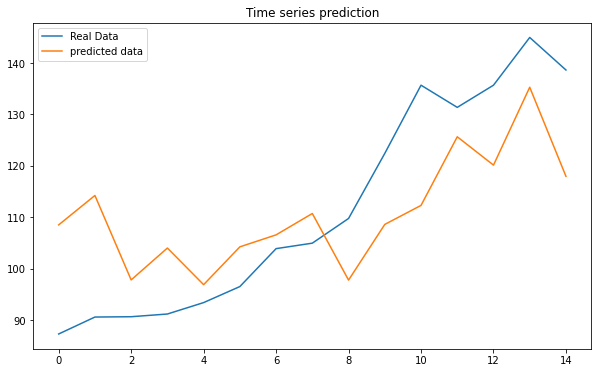

In [66]:
#Figure

plt.figure(figsize = (10,6)) # Plotting
plt.plot(real_data, label = 'Real Data')
plt.plot(predict_data, label = 'predicted data')
plt.title('Time series prediction')
plt.legend()
plt.show()